Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

# 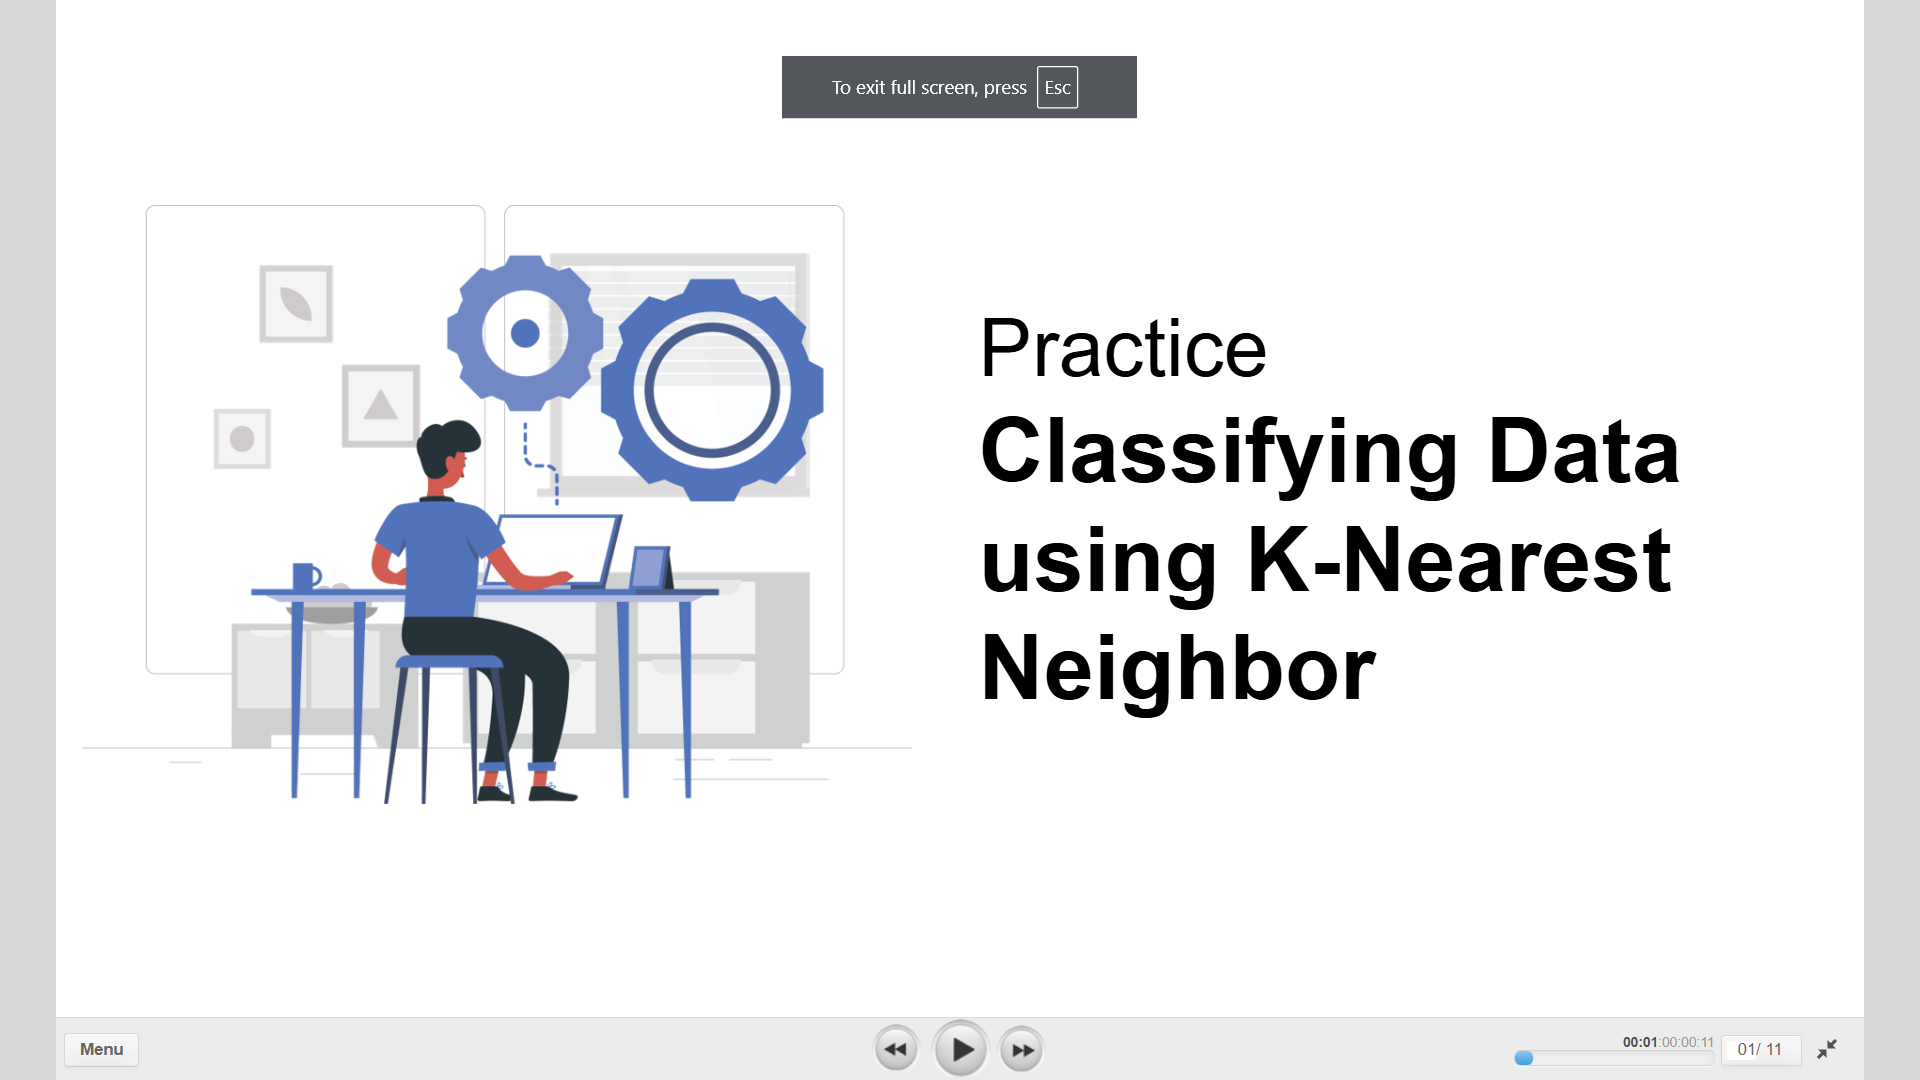

# 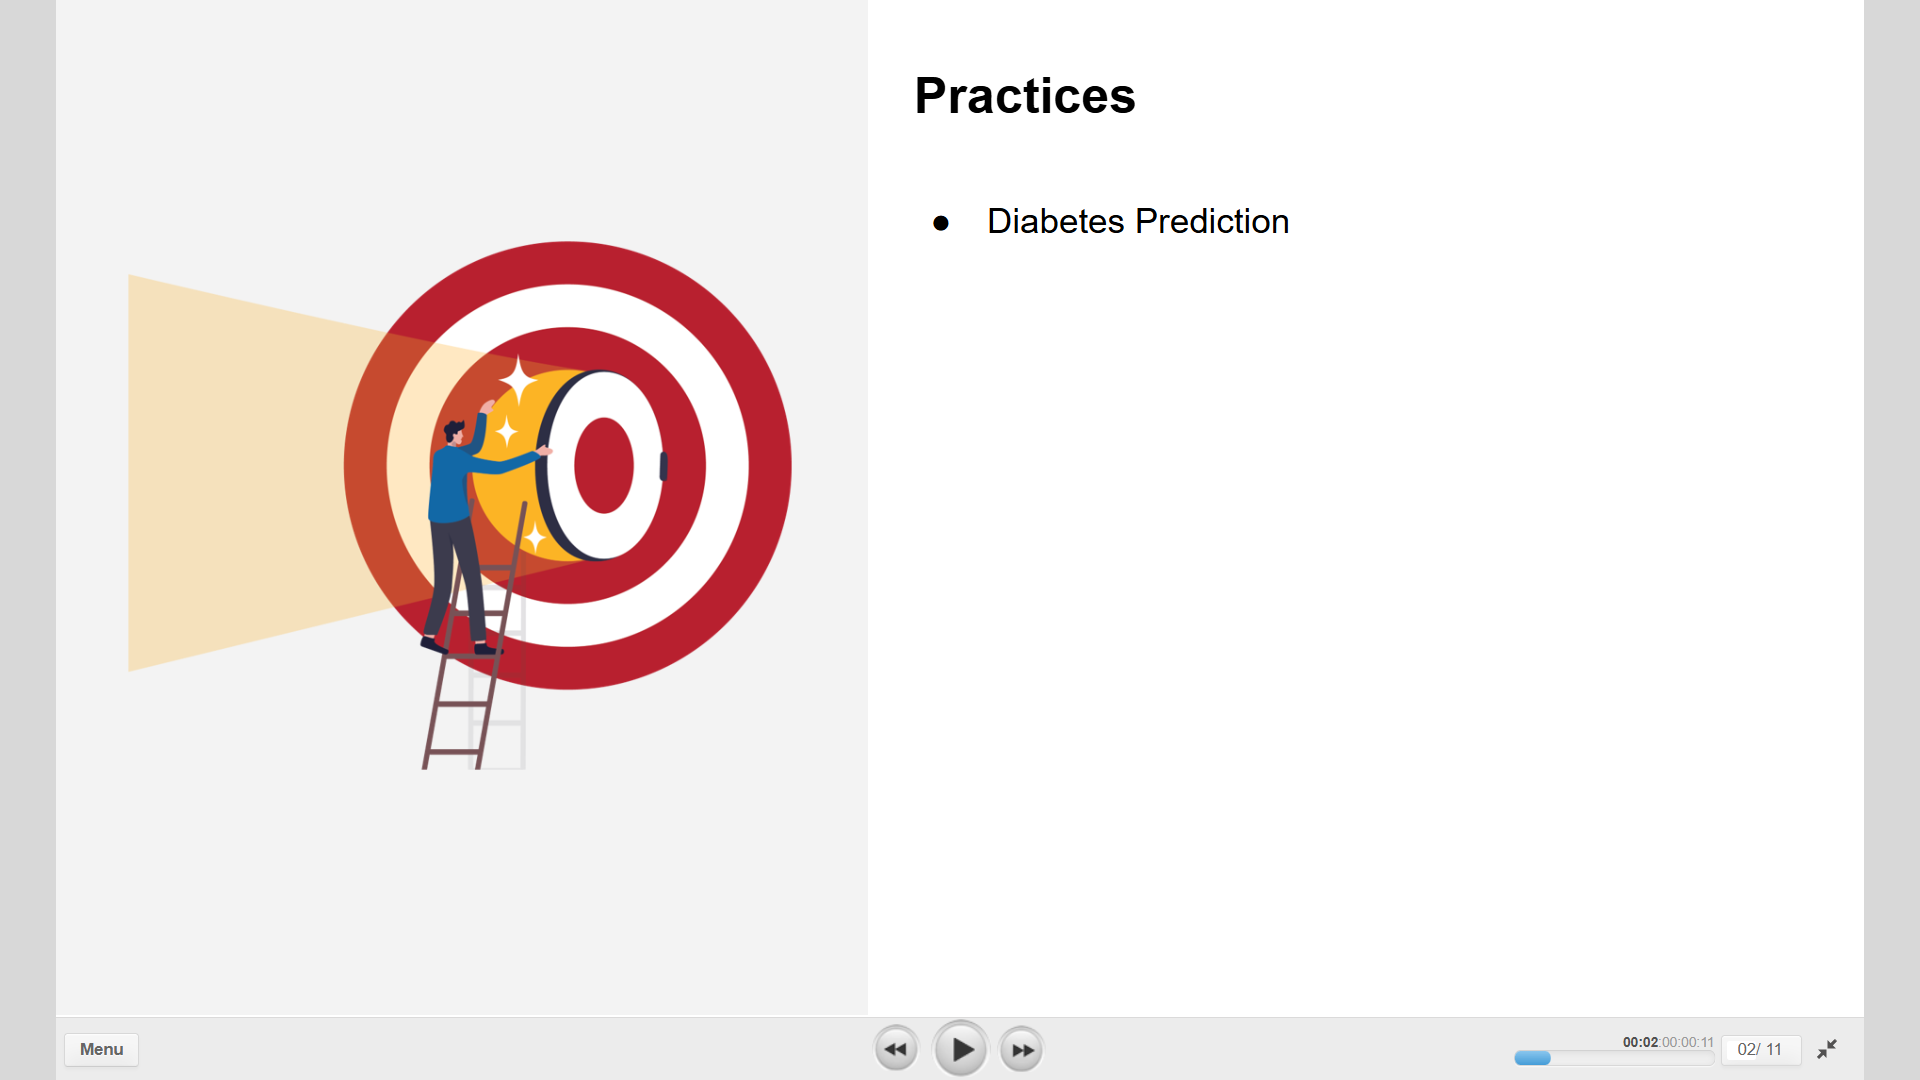

# 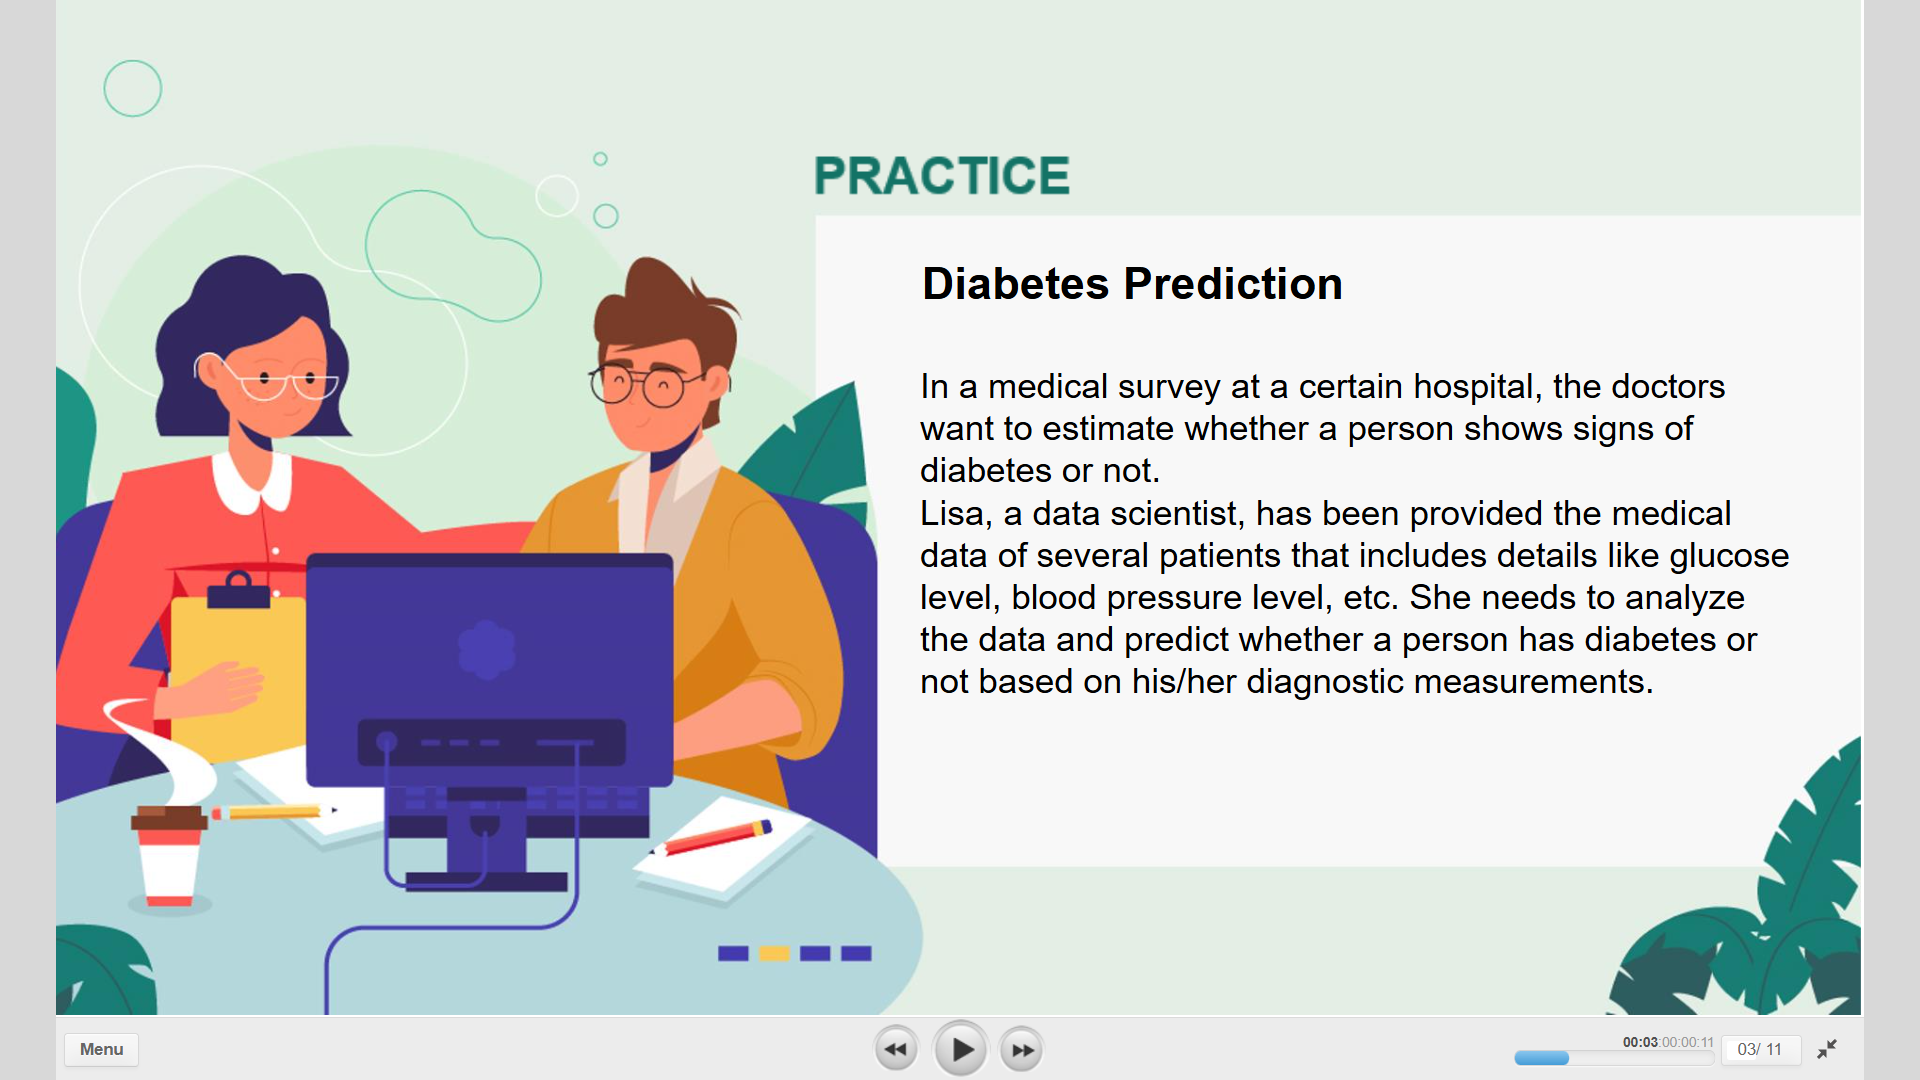

# 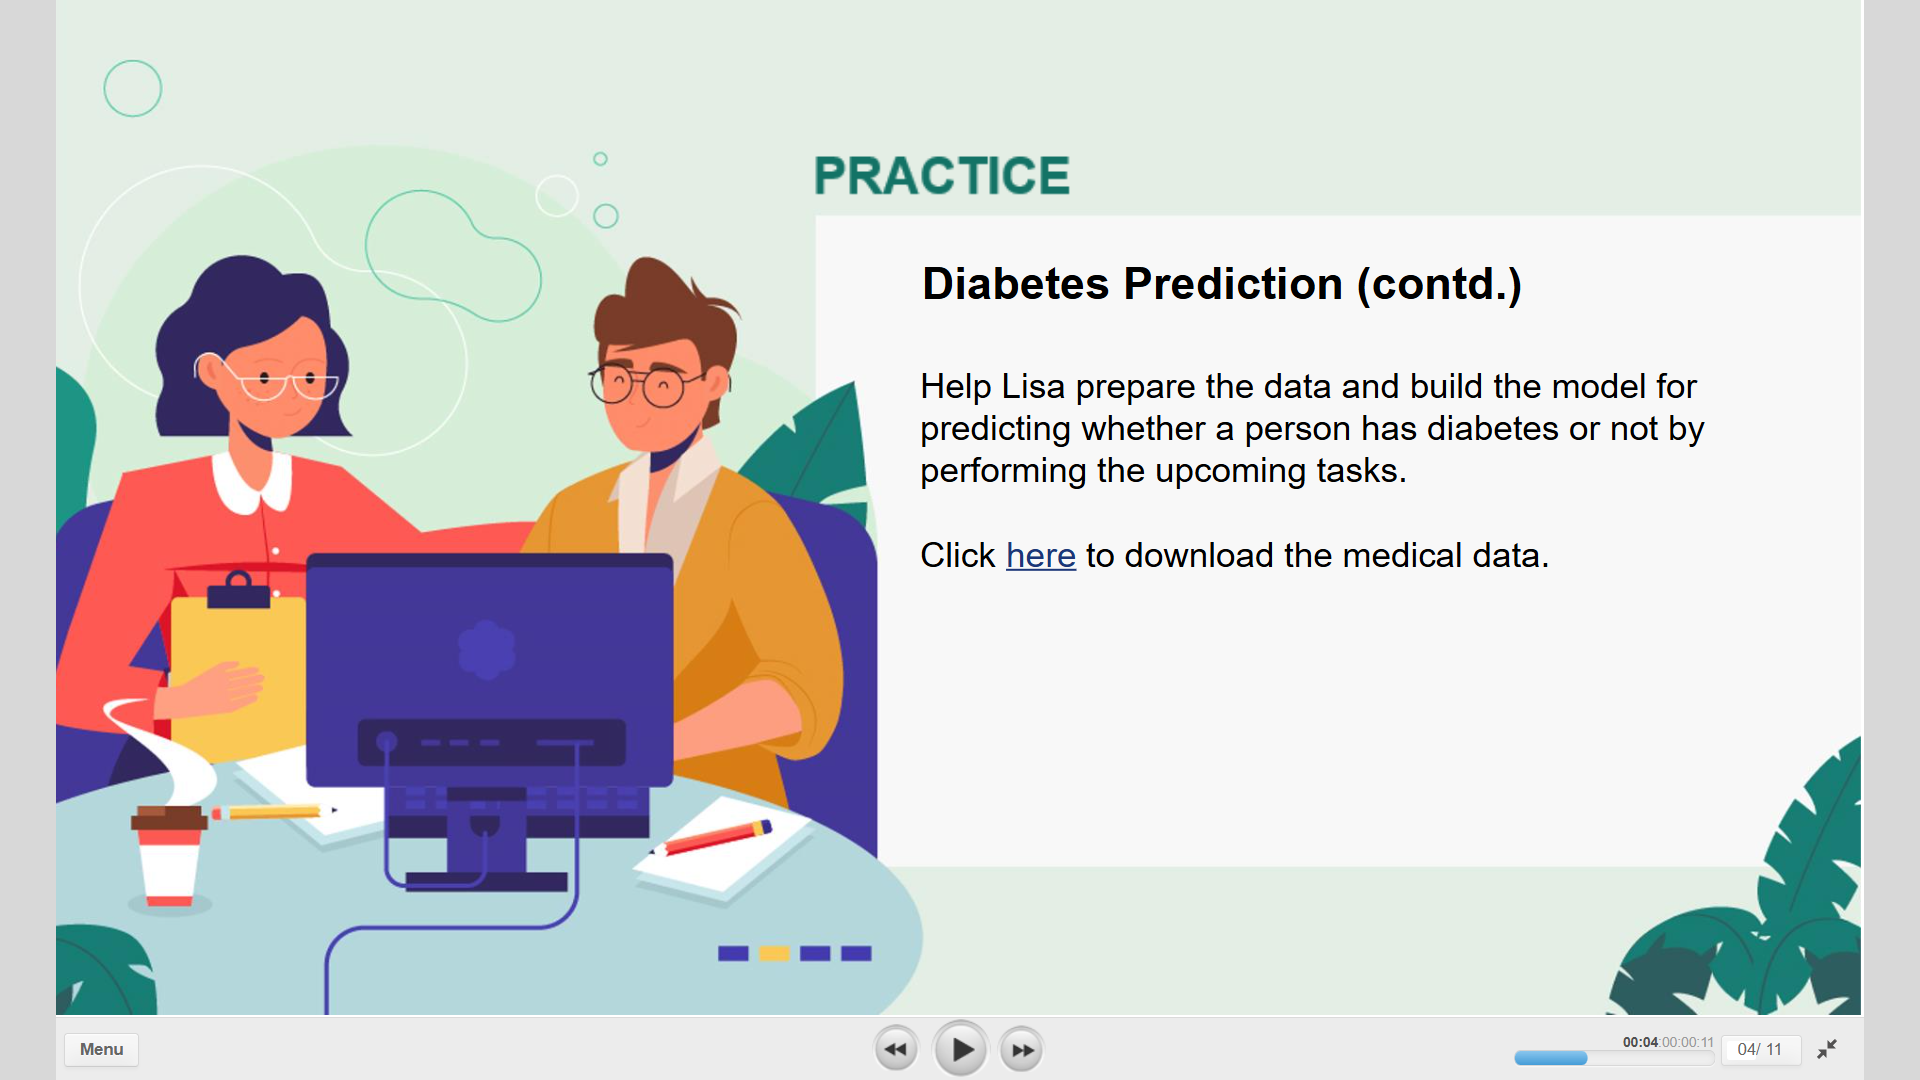

# 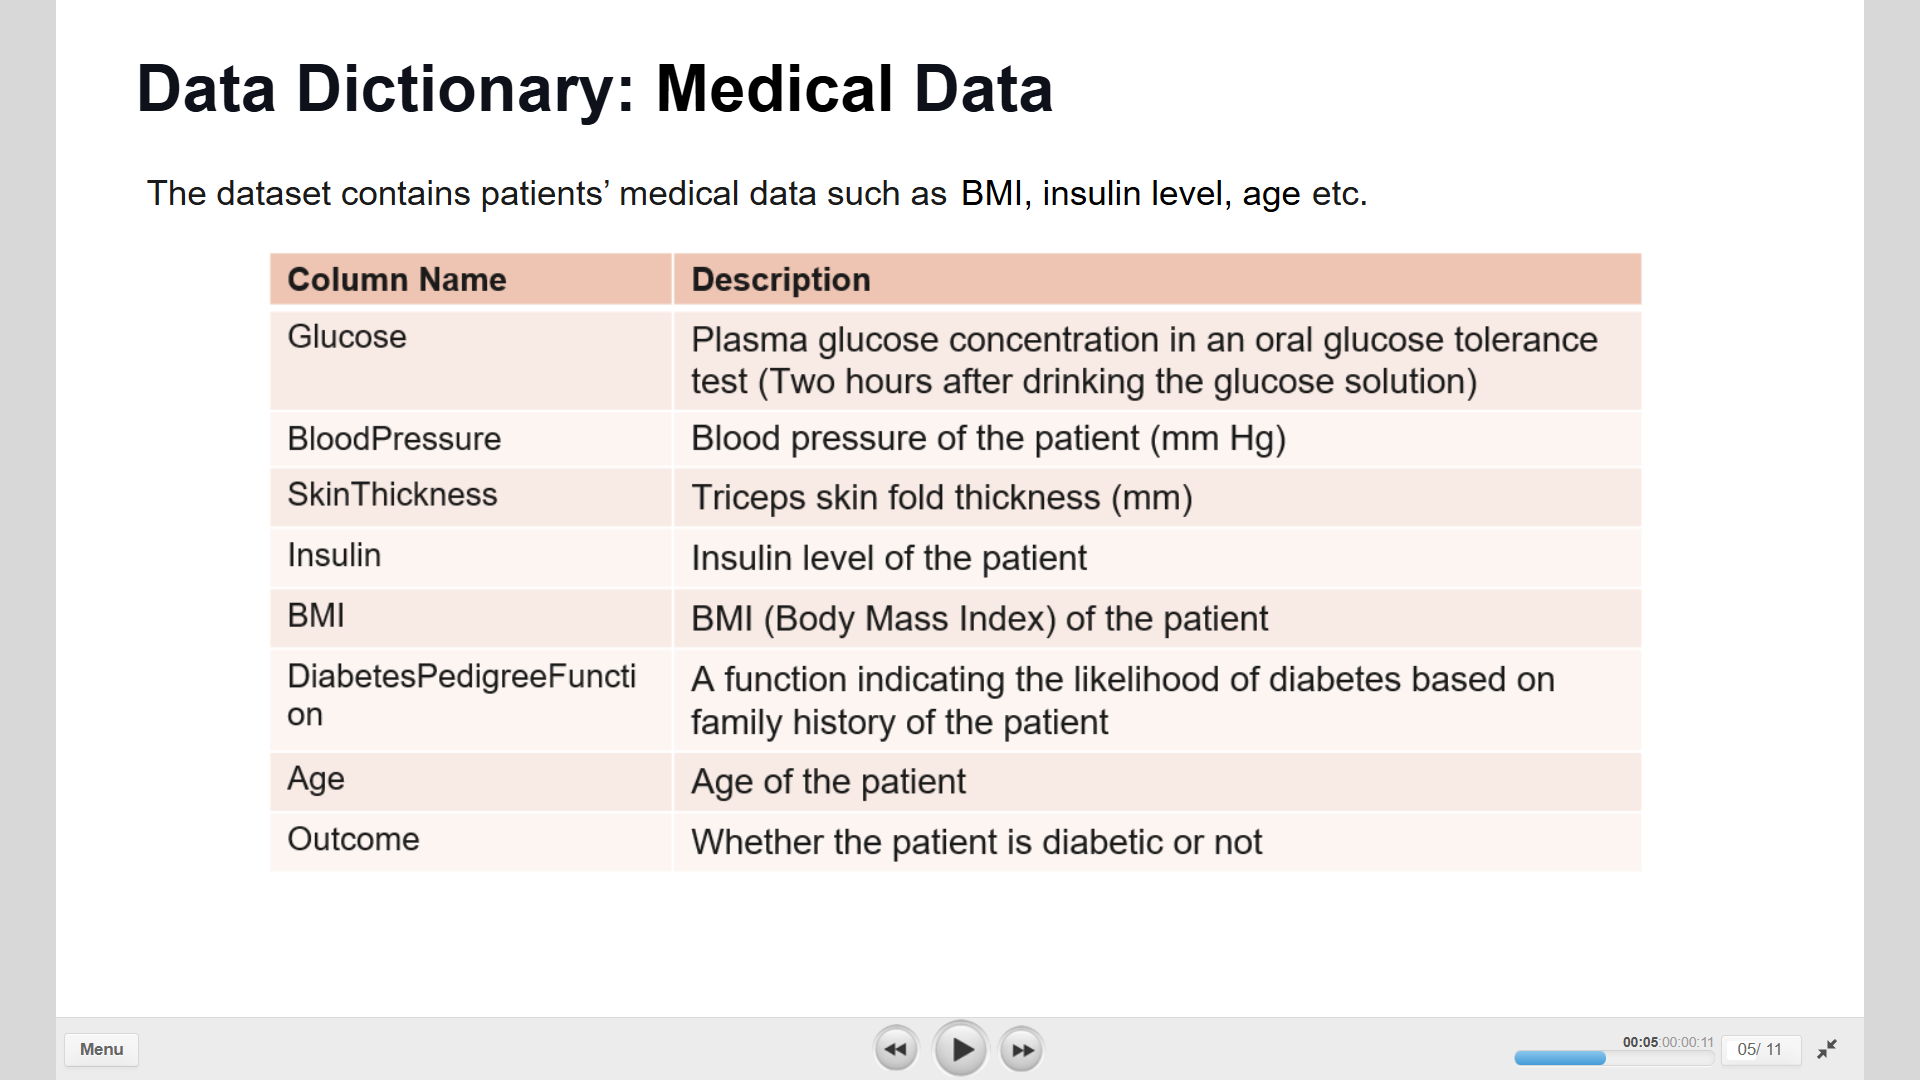

# 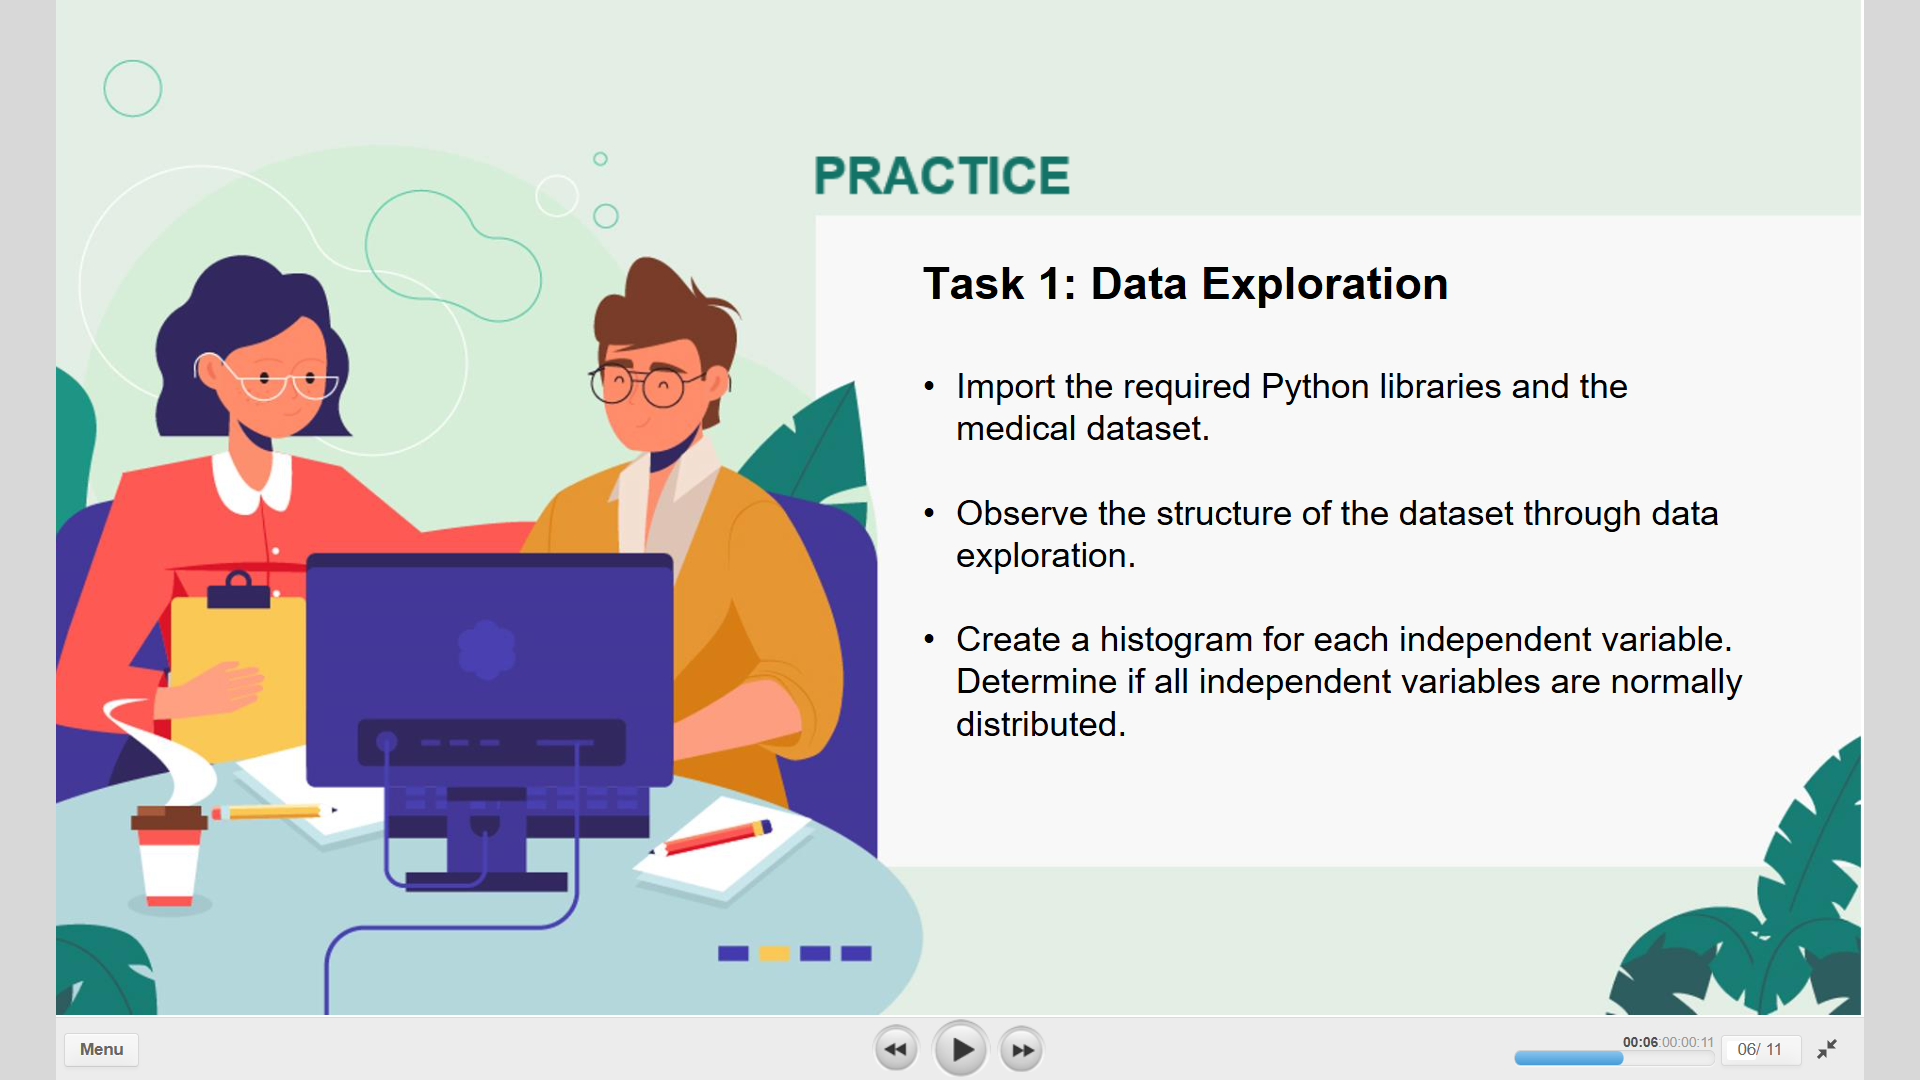

In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets,neighbors
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [9]:

medical_df=pd.read_csv('Downloads/ds_c9_s5_practice-main/ds_c9_s5_practice-main/DS1_C9_S5_Practice_Diabetes_Data.csv')

In [11]:
medical_df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [15]:
# structure of the dataset
medical_df.shape

(768, 8)

In [17]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [19]:
medical_df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
medical_df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
medical_df

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

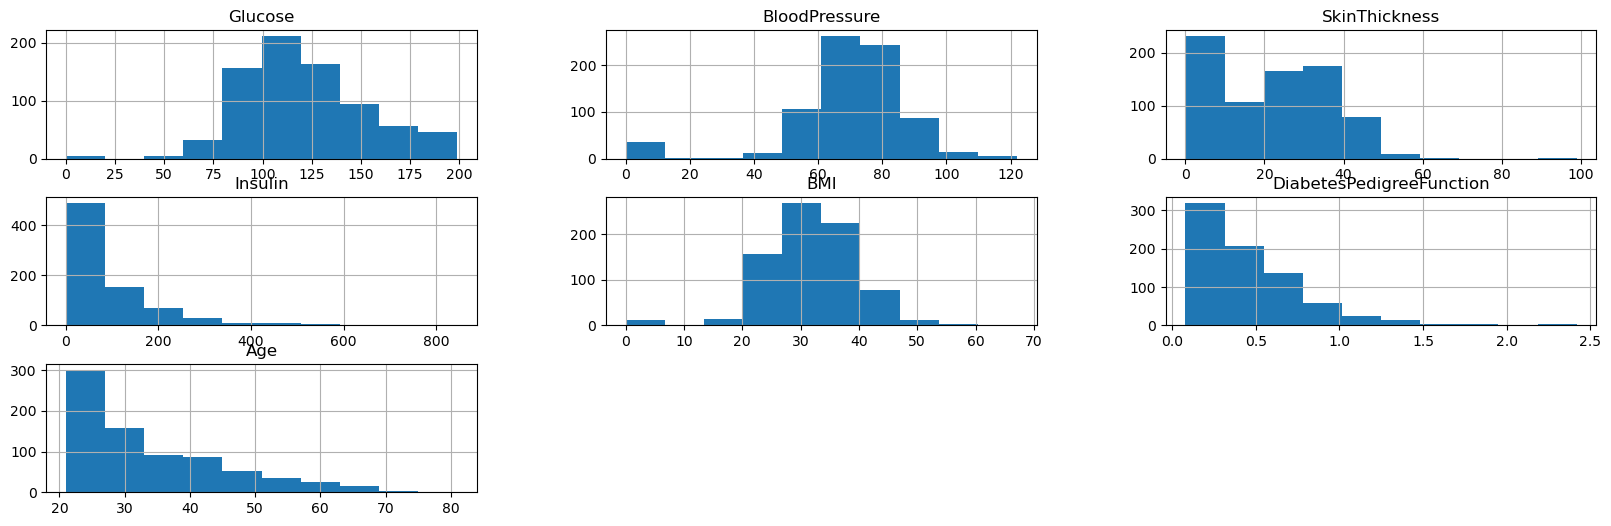

In [35]:
iv=medical_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age']]
iv.hist()
plt.gcf().set_size_inches(20,6)
plt.show()

# no all the independent  variable are not normaly distributed.

In [38]:
def iqr_winzorization(df,thresh=1.5):
    df_out=df.copy()
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        Q1=df_out[col].quantile(0.25)
        Q3=df_out[col].quantile(0.75)
        IQR=Q3-Q1
        lower_fence=Q1-thresh*IQR
        upper_fence=Q3+thresh*IQR
        df_out.loc[df_out[col]<lower_fence,col]=lower_fence
        df_out.loc[df_out[col]>upper_fence,col]=upper_fence
    return df_out
df=pd.DataFrame(iv)
iv_df=iqr_winzorization(df.copy())

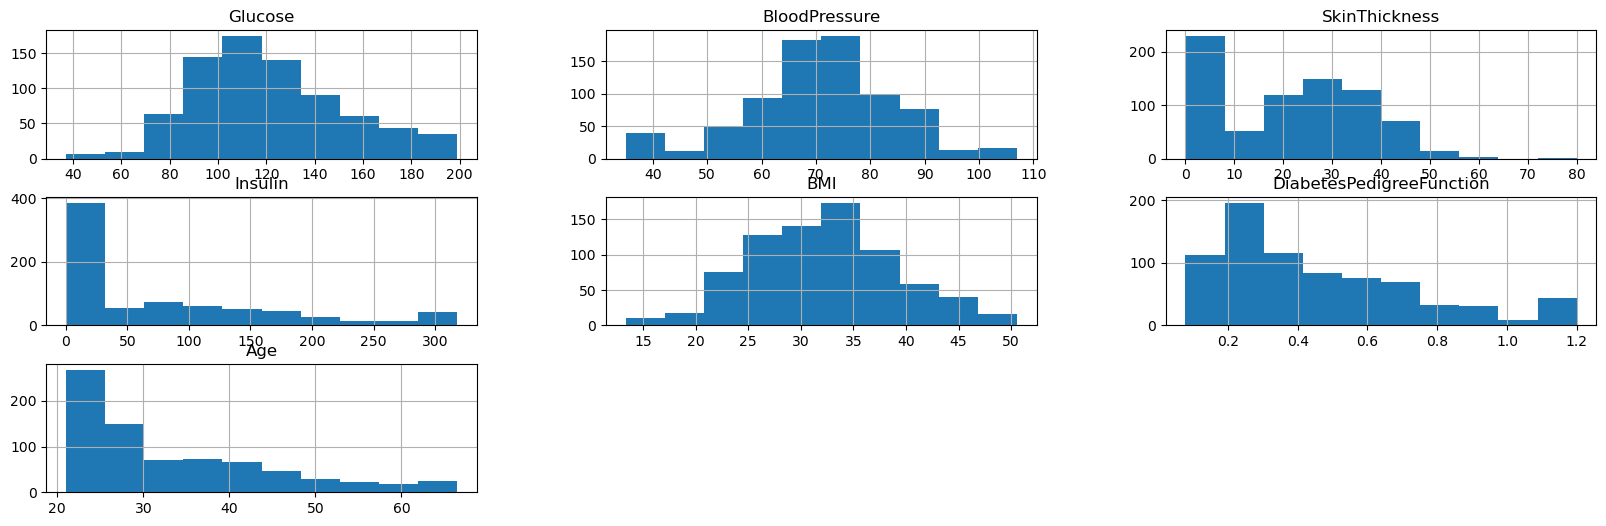

In [42]:
iv_df.hist()
plt.gcf().set_size_inches(20,6)
plt.show()

# 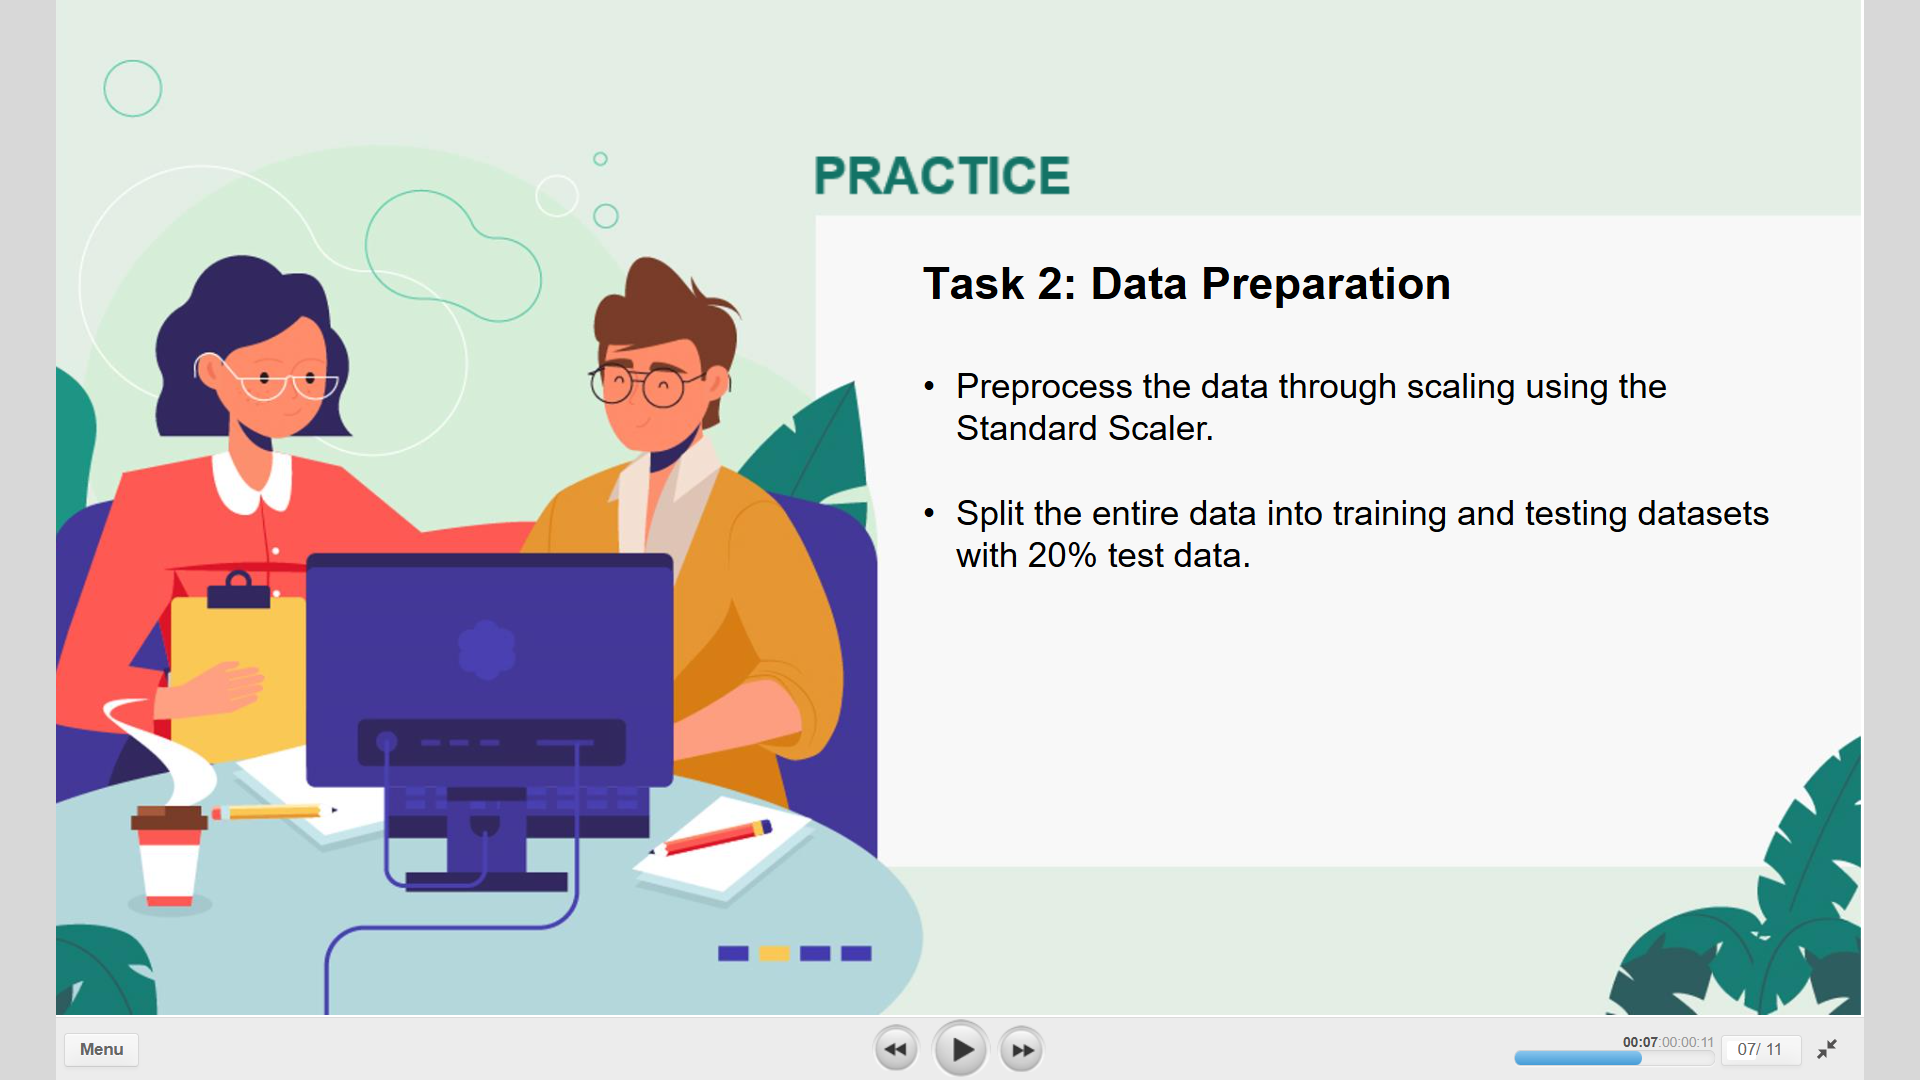

In [46]:
from sklearn.preprocessing import StandardScaler

In [52]:
cols=iv_df.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(iv_df)
df_scaled=pd.DataFrame(df_scaled,columns=cols)
df_scaled.head()

Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.861926       0.092691       0.914986 -0.787602  0.209359   
1 -1.159433      -0.330201       0.536065 -0.787602 -0.784254   
2  1.984903      -0.471166      -1.295388 -0.787602 -1.252672   
3 -1.031093      -0.330201       0.157144  0.217583 -0.571337   
4  0.508990      -2.162737       0.914986  1.008900  1.557835   

   DiabetesPedigreeFunction       Age  
0                  0.588927  1.445691  
1                 -0.378101 -0.189304  
2                  0.746595 -0.103252  
3                 -1.022787 -1.049828  
4                  2.596563 -0.017199

In [58]:
x=df_scaled
y=medical_df['Outcome']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

# 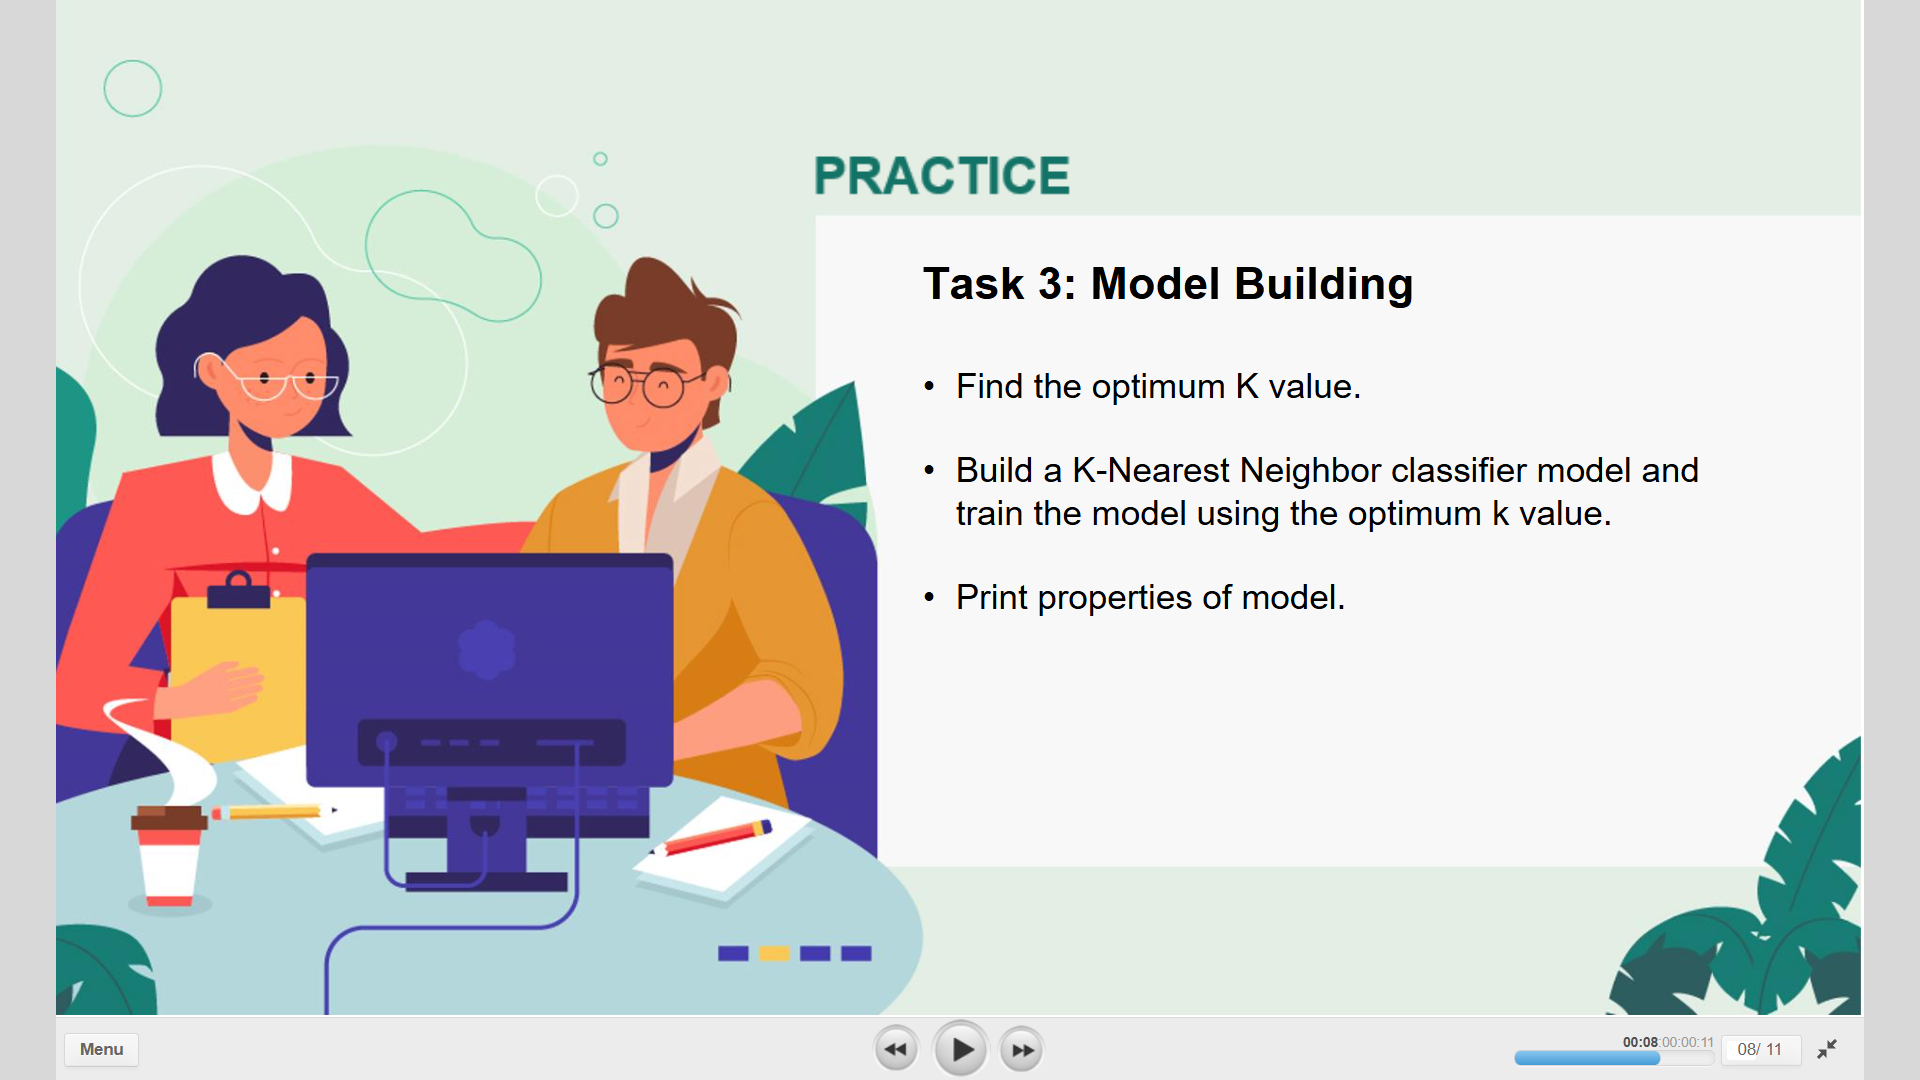

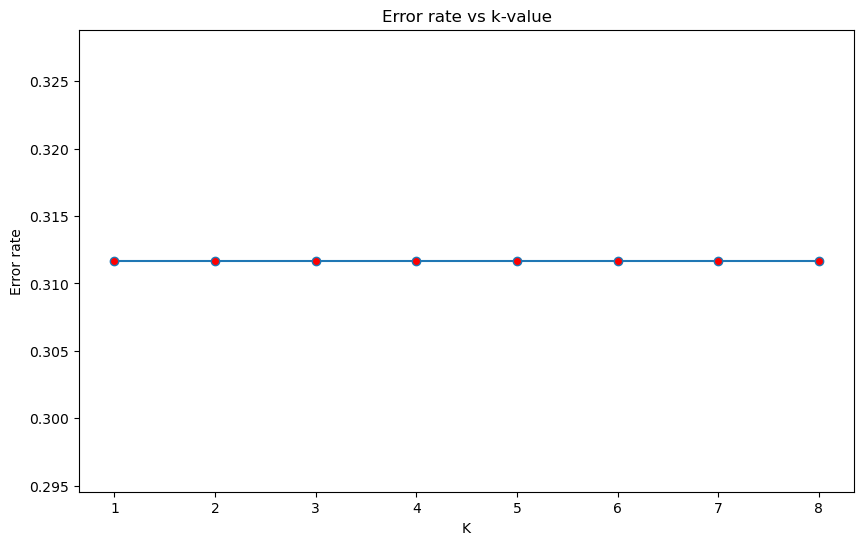

In [77]:
error_rate=[]
for i in range(1,9):
    clf_m=neighbors.KNeighborsClassifier(n_neighbors=1)
    clf_m.fit(x_train,y_train)
    pred_i=clf_m.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,9),error_rate,marker='o',markerfacecolor='red')
optimal_k=np.argmin(error_rate)+1
min_error=min(error_rate)
plt.title('Error rate vs k-value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [79]:
k=4
clf=neighbors.KNeighborsClassifier(k)
clf.fit(x,y)

KNeighborsClassifier(n_neighbors=4)

In [81]:
print(clf.classes_)
print(clf.n_neighbors)

[0 1]
4


# 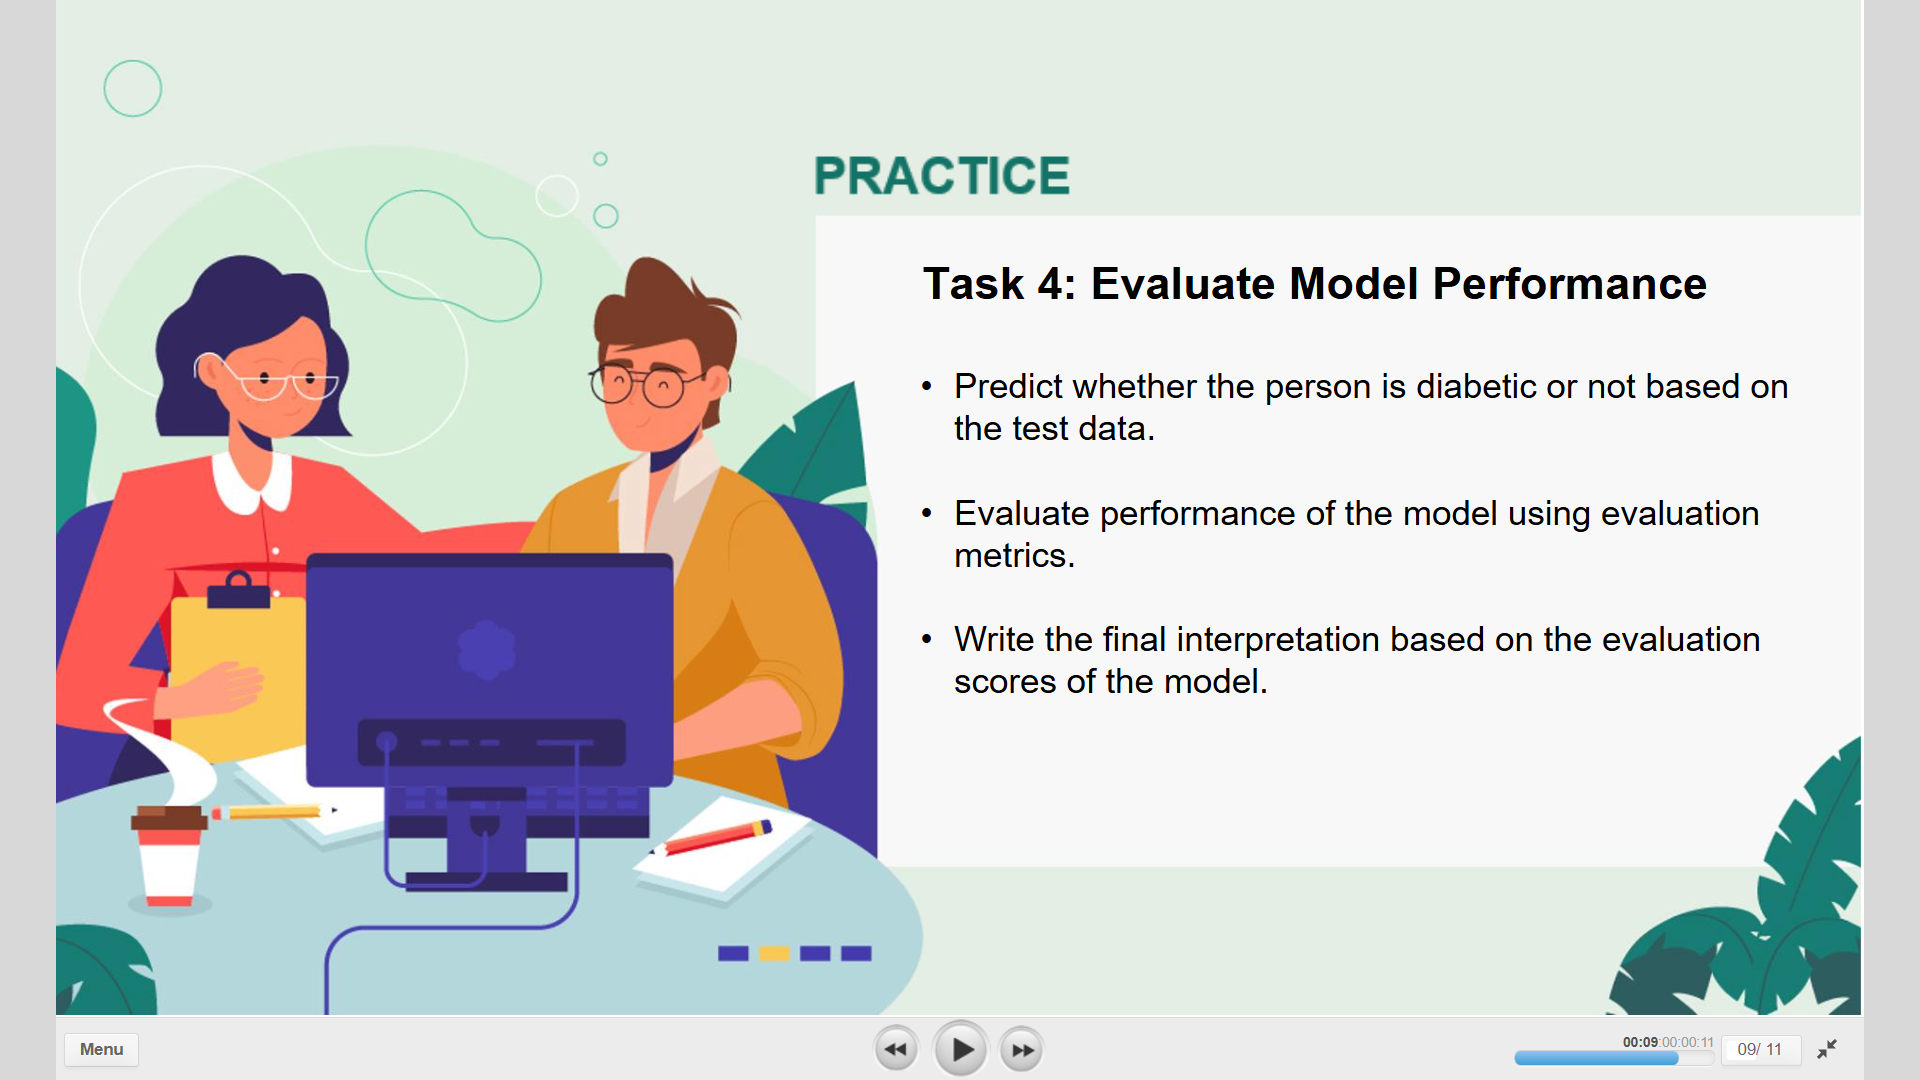

# 

In [83]:
test=np.reshape(x_test,(1,-1))
predict=clf.predict(x_test)
predict

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [85]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [91]:
print('Accuracy',accuracy_score(predict,y_test))

Accuracy 0.8246753246753247


# accuracy is good 82.46

In [93]:
print('Recall',recall_score(predict,y_test,average='macro'))
print('F1-Score',f1_score(predict,y_test,average='macro'))
print('Precision',precision_score(predict,y_test,average='macro'))

Recall 0.8201844262295082
F1-Score 0.7701619589851307
Precision 0.7485583615032809


# 0.74 is a good precison level same for f1_score 0.77 .a good recall score of 0.82

In [116]:
from sklearn.metrics import roc_auc_score
y_pred_probab=clf_m.predict_proba(x_test)[:,1]
roc_score=roc_auc_score(y_test,y_pred_probab)
roc_score

0.6384967190296281

# roc_score is 0.63 which is fair there is room to improvement .